In [1]:
%matplotlib inline

# Linear regression
## Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from the number of fire in the city of Chicago

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

DATA_FILE = '../data/fire_theft.xls'

# Phase 1: Assemble the graph

In [6]:
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [7]:
data

array([[   6.2,   29. ],
       [   9.5,   44. ],
       [  10.5,   36. ],
       [   7.7,   37. ],
       [   8.6,   53. ],
       [  34.1,   68. ],
       [  11. ,   75. ],
       [   6.9,   18. ],
       [   7.3,   31. ],
       [  15.1,   25. ],
       [  29.1,   34. ],
       [   2.2,   14. ],
       [   5.7,   11. ],
       [   2. ,   11. ],
       [   2.5,   22. ],
       [   4. ,   16. ],
       [   5.4,   27. ],
       [   2.2,    9. ],
       [   7.2,   29. ],
       [  15.1,   30. ],
       [  16.5,   40. ],
       [  18.4,   32. ],
       [  36.2,   41. ],
       [  39.7,  147. ],
       [  18.5,   22. ],
       [  23.3,   29. ],
       [  12.2,   46. ],
       [   5.6,   23. ],
       [  21.8,    4. ],
       [  21.6,   31. ],
       [   9. ,   39. ],
       [   3.6,   15. ],
       [   5. ,   32. ],
       [  28.6,   27. ],
       [  17.4,   32. ],
       [  11.3,   34. ],
       [   3.4,   17. ],
       [  11.9,   46. ],
       [  10.5,   42. ],
       [  10.7,   43. ],


In [23]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(dtype=tf.float16, shape=[], name='X')
Y = tf.placeholder(dtype=tf.float16, shape=[], name='Y')

# Step 3: create weight and bias, initialized to 0
# name your variables w and b
w = tf.Variable(dtype=tf.float16, initial_value=0, trainable=True, name='w')
b = tf.Variable(dtype=tf.float16, initial_value=0, trainable=True, name='b')

# Step 4: predict Y (number of theft) from the number of fire
# name your variable Y_predicted
Y_predicted = tf.multiply(w, X) + b

# Step 5: use the square error as the loss function
# name your variable loss
loss = tf.square(Y - Y_predicted)

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

# Phase 2: Train our model

Epoch 0: 2068.94331287
Epoch 1: 2113.23138137
Epoch 2: 2089.64858282
Epoch 3: 2064.87567429
Epoch 4: 2044.27546038
Epoch 5: 2021.38562593
Epoch 6: 2000.74951172
Epoch 7: 1977.95324126
Epoch 8: 1962.24669829
Epoch 9: 1941.50095331
Epoch 10: 1923.03078497
Epoch 11: 1905.58386812
Epoch 12: 1887.49353609
Epoch 13: 1872.72056362
Epoch 14: 1854.37079148
Epoch 15: 1840.28410993
Epoch 16: 1822.76095726
Epoch 17: 1809.50824411
Epoch 18: 1796.49065871
Epoch 19: 1783.74301293
Epoch 20: 1771.08236258
Epoch 21: 1757.91493588
Epoch 22: 1745.20817057
Epoch 23: 1733.90125093
Epoch 24: 1721.25440034
Epoch 25: 1714.22019159
Epoch 26: 1703.59196545
Epoch 27: 1693.56166295
Epoch 28: 1682.64204334
Epoch 29: 1669.44781203
Epoch 30: 1660.74508376
Epoch 31: 1654.05310785
Epoch 32: 1642.84796433
Epoch 33: 1632.10785348
Epoch 34: 1627.56001209
Epoch 35: 1618.1028704
Epoch 36: 1610.37393043
Epoch 37: 1604.97716123
Epoch 38: 1601.24082874
Epoch 39: 1592.89097377
Epoch 40: 1586.8709368
Epoch 41: 1581.56728981
Epoc

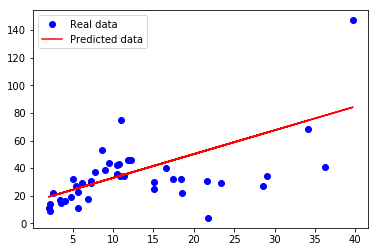

In [24]:
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    # TO - DO	
    sess.run(tf.global_variables_initializer())

    # Step 8: train the model
    for i in range(100): # run 100 epochs
        total_loss = 0

        for x, y in data:
            # Session runs optimizer to minimize loss and fetch the value of loss
            # TO DO: write sess.run()
            _, l = sess.run([optimizer, loss], {X: x, Y: y})
            total_loss += l
        print "Epoch {0}: {1}".format(i, total_loss/n_samples)
    
    # Step 9: get w and b value
    w_value, b_value = sess.run([w, b])
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()